# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#dependencies et al.
import matplotlib.pyplot as plt
import json
import requests
import pandas as pd
import numpy as np
import time

#api_keys
import api_keys

#citipy
from citipy import citipy

#range of lats and longs - https://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm
lat_range = (-90, 90)
long_range = (-180, 180)

#output file
output_file = "../output_data/cities_final.csv"

## Generate Cities List

In [2]:
#https://github.com/wingchen/citipy

#create list for storing lat, long conbination to be then fed into citipy.
lats_longs = []
cities = []

#https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
latitudes = np.random.uniform(-90.000, 90.000, 2000)
longtitudes = np.random.uniform(-180.000, 180.000, 2000)
lats_longs = zip(latitudes, longtitudes)

#use citipy to find city matching lats_longs combination
for lat_long in lats_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    #https://stackoverflow.com/questions/38872376/get-the-weather-for-cities-with-names-that-contain-spaces-using-openweathermap
    city = city.replace(" ",  "%20")
    #store into cities list only unique values from city
    if city not in cities:
        cities.append(city)

#number of result to determine if 500 city sample condition will be met
len(cities)
# print(cities)


769

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# #Test to verify that query and keys work
# # OpenWeatherMap API Key

# api_key = api_keys.weather_api_key

# # Save config information.
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"

# query_url = f"{url}appid={api_key}&units={units}&q="
# response = requests.get(query_url + "perth").json()
# response

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.weather_api_key

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={api_key}&units={units}&q="

#what are we retrieving? create lists for each of these
lng = []
lat = []
country = []
sunrise = []
sunset = []
date = []
temp_max = []
temp_min = []
temp_feels = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []

record = 0
set_number = 1

#print statements
print(f"Beginning Data Retrieval\n-------------------------------")

#loop to cycle through cities list to obtain information for DF.
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        sunrise.append(response['sys']['sunrise'])
        sunset.append(response['sys']['sunset'])
        cloudiness.append(response['clouds']['all'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp_max.append(response['main']['temp_max'])
        temp_min.append(response['main']['temp_min'])
        temp_feels.append(response['main']['feels_like'])
        wind_speed.append(response['wind']['speed'])
        if record > 49:
            record = 1
            set_number += 1
            city_name.append(response['name'])
        else:
            record += 1
            city_name.append(response['name'])
            
        print(f"Processing Record {record} of Set {set_number} | {response['name']}")
                                
    except Exception:
        print("City not found. Skipping...")
        
    #free API limited to 60 calls / minute - https://www.programiz.com/python-programming/time/sleep
    time.sleep(1.01)
    
print(f"-------------------------------\
      \nData Retrieval Complete\
      \n-------------------------------\
      \nThe number of datapoints data sets retrieved is {len(city_name)}")


Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Ardakān
Processing Record 2 of Set 1 | Vaini
Processing Record 3 of Set 1 | Nizhneangarsk
Processing Record 4 of Set 1 | Jamestown
Processing Record 5 of Set 1 | Loknya
Processing Record 6 of Set 1 | Nome
Processing Record 7 of Set 1 | Jiaojiang
Processing Record 8 of Set 1 | Busselton
Processing Record 9 of Set 1 | Bluff
Processing Record 10 of Set 1 | Rikitea
Processing Record 11 of Set 1 | Mar del Plata
Processing Record 12 of Set 1 | Yellowknife
Processing Record 13 of Set 1 | Mataura
Processing Record 14 of Set 1 | Saldanha
Processing Record 15 of Set 1 | Itacurubí del Rosario
Processing Record 16 of Set 1 | Nassau
Processing Record 17 of Set 1 | Necochea
City not found. Skipping...
Processing Record 18 of Set 1 | Conceição da Barra
Processing Record 19 of Set 1 | East London
City not found. Skipping...
Processing Record 20 of Set 1 | Forio
Processing Record 21 of Set 1 | Oruzgan
Processing Rec

Processing Record 36 of Set 4 | Eureka
Processing Record 37 of Set 4 | Along
Processing Record 38 of Set 4 | Carnarvon
Processing Record 39 of Set 4 | Buala
City not found. Skipping...
City not found. Skipping...
Processing Record 40 of Set 4 | Khandyga
Processing Record 41 of Set 4 | Babushkin
Processing Record 42 of Set 4 | Gambo
Processing Record 43 of Set 4 | Samagaltay
Processing Record 44 of Set 4 | Jumla
Processing Record 45 of Set 4 | Ribeira Grande
Processing Record 46 of Set 4 | Castro
Processing Record 47 of Set 4 | Chui
Processing Record 48 of Set 4 | Inhambane
Processing Record 49 of Set 4 | Haizhou
Processing Record 50 of Set 4 | Severo-Kuril'sk
Processing Record 1 of Set 5 | Wukari
Processing Record 2 of Set 5 | Okhotsk
Processing Record 3 of Set 5 | Cidreira
Processing Record 4 of Set 5 | Faanui
Processing Record 5 of Set 5 | San Patricio
Processing Record 6 of Set 5 | Balikpapan
Processing Record 7 of Set 5 | Meridian
Processing Record 8 of Set 5 | Wuzhou
Processing Re

Processing Record 27 of Set 8 | Mount Gambier
Processing Record 28 of Set 8 | Bargur
Processing Record 29 of Set 8 | Sinnamary
Processing Record 30 of Set 8 | Labuan
Processing Record 31 of Set 8 | Namie
Processing Record 32 of Set 8 | Sinjai
Processing Record 33 of Set 8 | Barreirinhas
Processing Record 34 of Set 8 | Jidong
Processing Record 35 of Set 8 | Bereda
Processing Record 36 of Set 8 | Kavieng
Processing Record 37 of Set 8 | Tambun
Processing Record 38 of Set 8 | Dinghaicun
Processing Record 39 of Set 8 | Kalach-na-Donu
Processing Record 40 of Set 8 | Pevek
Processing Record 41 of Set 8 | Glenwood Springs
Processing Record 42 of Set 8 | Saskylakh
Processing Record 43 of Set 8 | Chicama
Processing Record 44 of Set 8 | Estevan
Processing Record 45 of Set 8 | Sretensk
Processing Record 46 of Set 8 | Mindyak
Processing Record 47 of Set 8 | Mirny
Processing Record 48 of Set 8 | Key West
Processing Record 49 of Set 8 | Oranjemund
City not found. Skipping...
Processing Record 50 of S

Processing Record 11 of Set 12 | Buluang
Processing Record 12 of Set 12 | Dzaoudzi
Processing Record 13 of Set 12 | Zhangaözen
Processing Record 14 of Set 12 | Nerchinskiy Zavod
Processing Record 15 of Set 12 | Sémbé
Processing Record 16 of Set 12 | Norman Wells
Processing Record 17 of Set 12 | Meadow Lake
Processing Record 18 of Set 12 | Rapid Valley
Processing Record 19 of Set 12 | Chapecó
Processing Record 20 of Set 12 | Pecos
Processing Record 21 of Set 12 | Warman
Processing Record 22 of Set 12 | Dessalines
Processing Record 23 of Set 12 | Sosnovo-Ozerskoye
Processing Record 24 of Set 12 | Tezu
Processing Record 25 of Set 12 | Boshnyakovo
Processing Record 26 of Set 12 | Sioux Lookout
Processing Record 27 of Set 12 | Sisak
Processing Record 28 of Set 12 | Lazurne
Processing Record 29 of Set 12 | Hilsa
Processing Record 30 of Set 12 | Honiara
Processing Record 31 of Set 12 | Aitape
Processing Record 32 of Set 12 | Fayaoué
Processing Record 33 of Set 12 | Gravdal
Processing Record 3

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#  from example csv. City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
weather_dictionary = {
    "City":city_name,
    "Country":country,
    "Lat":lat,
    "Lng":lng,
    "Max Temp (Celsius)":temp_max,
    "Humidity %":humidity,
    "Cloudiness %":cloudiness,
    "Wind Speed (kmph)":wind_speed,
    "Date":date
}

In [13]:
city_weather = pd.DataFrame(weather_dictionary)
print(f' There are {city_weather["City"].count()} results in this dataframe')

 There are 682 results in this dataframe


In [40]:
#NOTE: Data csv produced in below row after clean step, in case there ARE any results where humidity > 100%
city_weather.head()

,City,Country,Lat,Lng,Max Temp (Celsius),Humidity %,Cloudiness %,Wind Speed (kmph),Date
0,Ardakān,IR,32.3100,54.0175,16.00,25,0,1.03,1618885432
1,Vaini,TO,-21.2000,-175.2000,29.00,70,20,5.14,1618885204
2,Nizhneangarsk,RU,55.7833,109.5500,-1.51,88,100,4.36,1618885435
3,Jamestown,US,42.0970,-79.2353,9.44,87,90,2.57,1618885437
4,Loknya,RU,56.8300,30.1467,6.20,73,100,2.30,1618885438


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [41]:
#check to see if any rows have huminity > 100%
humidity_check = city_weather['Humidity %'].describe(include = 'all')
humidity_check

count    682.000000
mean      67.318182
std       22.620990
min        6.000000
25%       54.000000
50%       73.000000
75%       85.000000
max      100.000000
Name: Humidity %, dtype: float64

In [42]:
humidity_count_df = city_weather[city_weather['Humidity %'] > 100]

print(f'There are {humidity_count_df["City"].count()} cities in this dataset with humidity greater than 100%')

There are 0 cities in this dataset with humidity greater than 100%


In [43]:
#  Get the indices of cities that have humidity over 100%.
indexNames = city_weather[city_weather["Humidity %"] > 100].index

In [66]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_weather = city_weather.drop(indexNames, inplace = False)
clean_city_weather['Date'] = pd.to_datetime(clean_city_weather['Date'], unit = 's')
date_data_collected = pd.to_datetime(clean_city_weather['Date'][0]).strftime('%d/%m/%Y')
clean_city_weather.head()

,City,Country,Lat,Lng,Max Temp (Celsius),Humidity %,Cloudiness %,Wind Speed (kmph),Date
0,Ardakān,IR,32.3100,54.0175,16.00,25,0,1.03,2021-04-20 02:23:52
1,Vaini,TO,-21.2000,-175.2000,29.00,70,20,5.14,2021-04-20 02:20:04
2,Nizhneangarsk,RU,55.7833,109.5500,-1.51,88,100,4.36,2021-04-20 02:23:55
3,Jamestown,US,42.0970,-79.2353,9.44,87,90,2.57,2021-04-20 02:23:57
4,Loknya,RU,56.8300,30.1467,6.20,73,100,2.30,2021-04-20 02:23:58


In [67]:
print(f' There are {clean_city_weather["City"].count()} results in this cleaned dataframe\
\n i.e. {clean_city_weather["City"].count() - city_weather["City"].count()} results were removed.')
clean_city_weather.to_csv("../output_data/cities_FINAL.csv")

 There are 682 results in this cleaned dataframe
 i.e. 0 results were removed.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The diagram shows the relationship between the latitude and max temperatures (measured in degrees celsius) of individual cities in the sample dataset.
It would appear that the max temperatures seem to be the highest for cities closest to the equator.


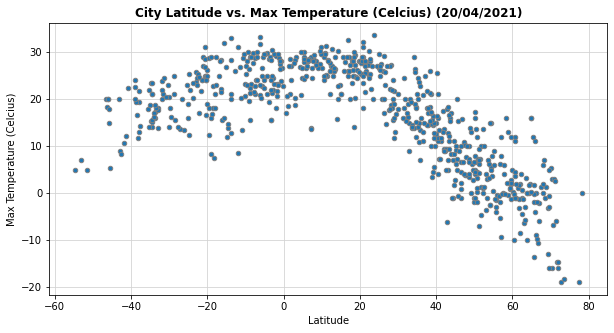

In [94]:
def latitude_temp():
    plt.figure(figsize=(10,5))
    x_axis = clean_city_weather['Lat']
    y_axis = clean_city_weather['Max Temp (Celsius)']
    plt.scatter(x_axis, y_axis, edgecolors = 'grey', s = 20, zorder = 3)
    plt.grid(zorder = 0, color = 'lightgrey')
    plt.xlabel('Latitude')
    plt.ylabel('Max Temperature (Celcius)')
    plt.title('City Latitude vs. Max Temperature (Celcius) ({})'.format(date_data_collected), fontweight = 'bold')
    plt.savefig("../output_data/City Latitude vs. Max Temperature (Celcius).png")
latitude_temp()
print(f'The diagram shows the relationship between the latitude and max temperatures (measured in degrees celsius) of individual cities in the sample dataset.\
\nIt would appear that the max temperatures seem to be the highest for cities closest to the equator.')

## Latitude vs. Humidity Plot

The plot does not appear to demonstrate any relationship between latitude and humidity levels.


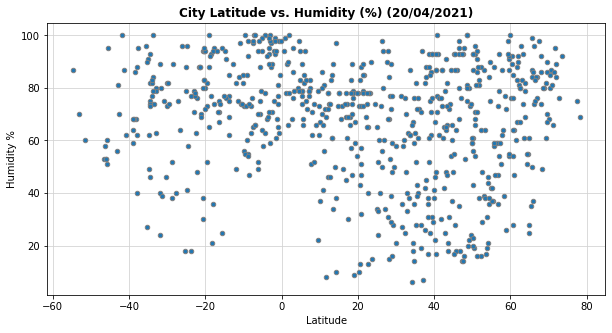

In [95]:
def latitude_humidity():
    plt.figure(figsize=(10,5))
    x_axis = clean_city_weather['Lat']
    y_axis = clean_city_weather['Humidity %']
    plt.scatter(x_axis, y_axis, edgecolors = 'grey', s = 20, zorder = 3)
    plt.grid(zorder = 0, color = 'lightgrey')
    plt.xlabel('Latitude')
    plt.ylabel('Humidity %')
    plt.title('City Latitude vs. Humidity (%) ({})'.format(date_data_collected), fontweight = 'bold')
    plt.savefig("../output_data/City Latitude vs. Humidity (%).png")
latitude_humidity()
print(f'The plot does not appear to demonstrate any relationship between latitude and humidity levels.')

## Latitude vs. Cloudiness Plot

The plot does not appear to demonstrate any relationship between latitude and cloudiness.


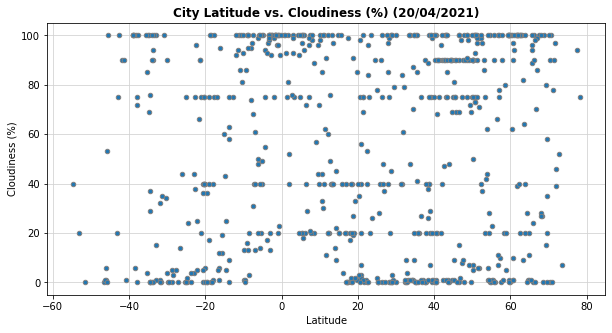

In [96]:
def latitude_cloudiness():
    plt.figure(figsize=(10,5))
    x_axis = clean_city_weather['Lat']
    y_axis = clean_city_weather['Cloudiness %']
    plt.scatter(x_axis, y_axis, edgecolors = 'grey', s = 20, zorder = 3)
    plt.grid(zorder = 0, color = 'lightgrey')
    plt.xlabel('Latitude')
    plt.ylabel('Cloudiness (%)')
    plt.title('City Latitude vs. Cloudiness (%) ({})'.format(date_data_collected), fontweight = 'bold')
    plt.savefig("../output_data/City Latitude vs. Cloudiness (%).png")
latitude_cloudiness()
print(f'The plot does not appear to demonstrate any relationship between latitude and cloudiness.')

## Latitude vs. Wind Speed Plot

The diagram perhaps demonstrates a loose relationship relationship between latitude and wind speeds.
Wind speeds appear to be minimal on the equator, with the most spread furthest away.


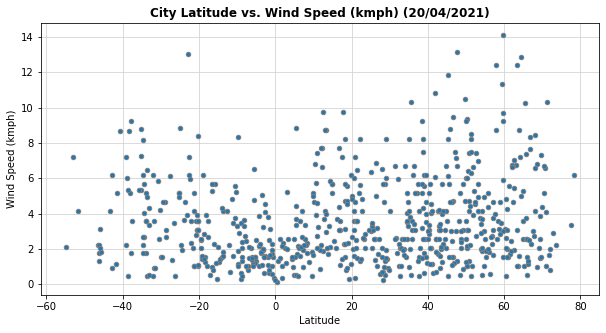

In [97]:
def latitude_wind_speed():
    plt.figure(figsize=(10,5))
    x_axis = clean_city_weather['Lat']
    y_axis = clean_city_weather['Wind Speed (kmph)']
    plt.scatter(x_axis, y_axis, edgecolors = 'grey', s = 20, zorder = 3)
    plt.grid(zorder = 0, color = 'lightgrey')
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed (kmph)')
    plt.title('City Latitude vs. Wind Speed (kmph) ({})'.format(date_data_collected), fontweight = 'bold')
    plt.savefig("../output_data/City Latitude vs. Wind Speed (kmph).png")
latitude_wind_speed()
print(f'The diagram perhaps demonstrates a loose relationship relationship between latitude and wind speeds.\
\nWind speeds appear to be minimal on the equator, with the most spread furthest away.')

## Linear Regression

In [111]:
#create two dfs, one for Northern Hermisphere (Latitude >= 0) and Southern Hermisphere (Latitude < 0)
#We will treat any cities that are on exactly 0 latitude to belong to Northern.
import scipy.stats as st
from scipy.stats import linregress
n_hemi_data = clean_city_weather.loc[clean_city_weather["Lat"] >= 0]
n_hemi_data.head()

,City,Country,Lat,Lng,Max Temp (Celsius),Humidity %,Cloudiness %,Wind Speed (kmph),Date
0,Ardakān,IR,32.3100,54.0175,16.00,25,0,1.03,2021-04-20 02:23:52
2,Nizhneangarsk,RU,55.7833,109.5500,-1.51,88,100,4.36,2021-04-20 02:23:55
3,Jamestown,US,42.0970,-79.2353,9.44,87,90,2.57,2021-04-20 02:23:57
4,Loknya,RU,56.8300,30.1467,6.20,73,100,2.30,2021-04-20 02:23:58
5,Nome,US,64.5011,-165.4064,2.00,55,1,12.86,2021-04-20 02:24:00


In [112]:
s_hemi_data = clean_city_weather.loc[clean_city_weather["Lat"] < 0]
s_hemi_data.head()

,City,Country,Lat,Lng,Max Temp (Celsius),Humidity %,Cloudiness %,Wind Speed (kmph),Date
1,Vaini,TO,-21.2000,-175.2000,29.00,70,20,5.14,2021-04-20 02:20:04
7,Busselton,AU,-33.6500,115.3333,17.22,84,94,0.45,2021-04-20 02:24:02
8,Bluff,NZ,-46.6000,168.3333,20.00,53,0,2.24,2021-04-20 02:21:25
9,Rikitea,PF,-23.1203,-134.9692,25.65,71,4,3.91,2021-04-20 02:24:05
10,Mar del Plata,AR,-38.0023,-57.5575,19.44,88,0,5.14,2021-04-20 02:24:06


In [113]:
total_cities = clean_city_weather["City"].count()
n_city_count = n_hemi_data["City"].count()
s_city_count = s_hemi_data["City"].count()

print("There are {}({:.1%}) cities out of {} in this dataset localed in the Northern Hermisphere."
      .format(n_city_count, n_city_count/total_cities, total_cities))
      
print("There are {}({:.1%}) cities out of {} in this dataset localed in the Southern Hermisphere."
      .format(s_city_count, s_city_count/total_cities, total_cities))

There are 473(69.4%) cities out of 682 in this dataset localed in the Northern Hermisphere.
There are 209(30.6%) cities out of 682 in this dataset localed in the Southern Hermisphere.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: -0.87     

The diagram shows the relationship between the latitude and max temperatures (measured in degrees celsius) of individual
cities in the northern hemisphere of the sample dataset.
The correlation coefficient would suggest a relatively strong relationship between the two variables.
It would appear to also support the preceeding suggestion that temperatures tend to be higher closer to the equator.


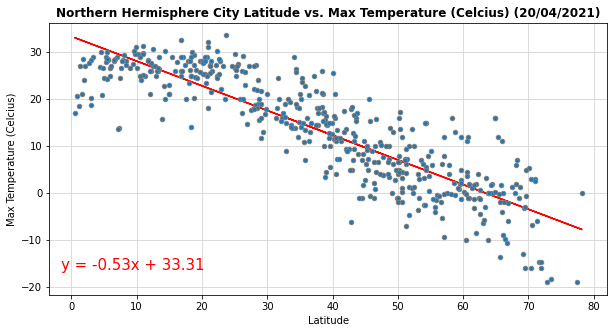

In [129]:
def latitude_temp_regression_north():
    plt.figure(figsize=(10,5))
    x_axis = n_hemi_data['Lat']
    y_axis = n_hemi_data['Max Temp (Celsius)']
    correlation = st.pearsonr(x_axis, y_axis)
    print(f'The correlation coefficient is: {round(correlation[0],2)}\
     \n')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis, y_axis, edgecolors = 'grey', s = 20, zorder = 3)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate( line_eq, xy = (0.1,0.18), xycoords = 'figure fraction', horizontalalignment = 'left', verticalalignment='bottom', fontsize=15, color="red")
    plt.grid(zorder = 0, color = 'lightgrey')
    plt.xlabel('Latitude')
    plt.ylabel('Max Temperature (Celcius)')
    plt.title('Northern Hermisphere City Latitude vs. Max Temperature (Celcius) ({})'.format(date_data_collected), fontweight = 'bold')
    plt.savefig("../output_data/Northern Hermisphere City Latitude vs. Max Temperature (Celcius) Regression.png")
latitude_temp_regression_north()
print(f'The diagram shows the relationship between the latitude and max temperatures (measured in degrees celsius) of individual\
\ncities in the northern hemisphere of the sample dataset.\
\nThe correlation coefficient would suggest a relatively strong relationship between the two variables.\
\nIt would appear to also support the preceeding suggestion that temperatures tend to be higher closer to the equator.')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: 0.56     

The diagram shows the relationship between the latitude and max temperatures (measured in degrees celsius) of individual
cities in the southern hemisphere of the sample dataset.
The correlation coefficient however, suggests a weaker relationship between the two variables when compared to the northern hermisphere.
It does however, still appear to also support the earlier suggestion that temperatures tend to be higher closer to the equator.


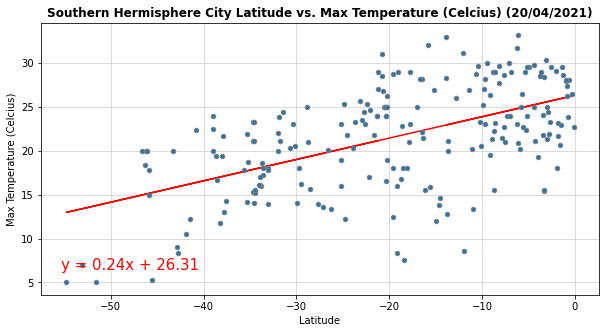

In [130]:
def latitude_temp_regression_south():
    plt.figure(figsize=(10,5))
    x_axis = s_hemi_data['Lat']
    y_axis = s_hemi_data['Max Temp (Celsius)']
    correlation = st.pearsonr(x_axis, y_axis)
    print(f'The correlation coefficient is: {round(correlation[0],2)}\
     \n')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis, y_axis, edgecolors = 'grey', s = 20, zorder = 3)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate( line_eq, xy = (0.1,0.18), xycoords = 'figure fraction', horizontalalignment = 'left', verticalalignment='bottom', fontsize=15, color="red")
    plt.grid(zorder = 0, color = 'lightgrey')
    plt.xlabel('Latitude')
    plt.ylabel('Max Temperature (Celcius)')
    plt.title('Southern Hermisphere City Latitude vs. Max Temperature (Celcius) ({})'.format(date_data_collected), fontweight = 'bold')
    plt.savefig("../output_data/Southern Hermisphere City Latitude vs. Max Temperature (Celcius) Regression.png")
latitude_temp_regression_south()
print(f'The diagram shows the relationship between the latitude and max temperatures (measured in degrees celsius) of individual\
\ncities in the southern hemisphere of the sample dataset.\
\nThe correlation coefficient however, suggests a weaker relationship between the two variables when compared to the northern hermisphere.\
\nIt does however, still appear to also support the earlier suggestion that temperatures tend to be higher closer to the equator.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.01     

The diagram shows the relationship between the latitude and humidity % of individual
cities in the northern hemisphere of the sample dataset.
The correlation coefficient suggests a weak relationship between the two variables.
It would appear to also support the preceeding suggestion that there is a lack of relationship between the two variables.


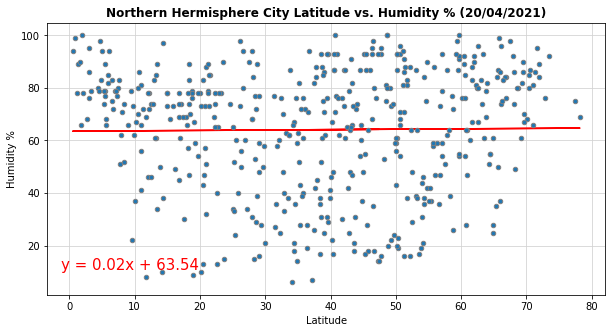

In [132]:
def latitude_humidity_regression_north():
    plt.figure(figsize=(10,5))
    x_axis = n_hemi_data['Lat']
    y_axis = n_hemi_data['Humidity %']
    correlation = st.pearsonr(x_axis, y_axis)
    print(f'The correlation coefficient is: {round(correlation[0],2)}\
     \n')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis, y_axis, edgecolors = 'grey', s = 20, zorder = 3)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate( line_eq, xy = (0.1,0.18), xycoords = 'figure fraction', horizontalalignment = 'left', verticalalignment='bottom', fontsize=15, color="red")
    plt.grid(zorder = 0, color = 'lightgrey')
    plt.xlabel('Latitude')
    plt.ylabel('Humidity %')
    plt.title('Northern Hermisphere City Latitude vs. Humidity % ({})'.format(date_data_collected), fontweight = 'bold')
    plt.savefig("../output_data/Northern Hermisphere City Latitude vs. Humidity % Regression.png")
latitude_humidity_regression_north()
print(f'The diagram shows the relationship between the latitude and humidity % of individual\
\ncities in the northern hemisphere of the sample dataset.\
\nThe correlation coefficient suggests a weak relationship between the two variables.\
\nIt would appear to also support the preceeding suggestion that there is a lack of relationship between the two variables.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.23     

The diagram shows the relationship between the latitude and humidity % of individual
cities in the southern hemisphere of the sample dataset.
The correlation coefficient suggests a relatively weak relationship between the two variables.
It would appear to also support the preceeding suggestion that there is a lack of relationship between the two variables.
However, there is perhaps marginally more of a relationship between latitude and humidity in the southern hermisphere over the north.
This observation could also be skewed slightly from the density of cities with higher humidity close to the equator


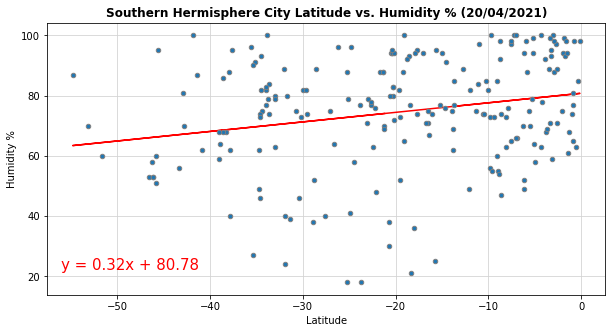

In [138]:
def latitude_humidity_regression_south():
    plt.figure(figsize=(10,5))
    x_axis = s_hemi_data['Lat']
    y_axis = s_hemi_data['Humidity %']
    correlation = st.pearsonr(x_axis, y_axis)
    print(f'The correlation coefficient is: {round(correlation[0],2)}\
     \n')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis, y_axis, edgecolors = 'grey', s = 20, zorder = 3)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate( line_eq, xy = (0.1,0.18), xycoords = 'figure fraction', horizontalalignment = 'left', verticalalignment='bottom', fontsize=15, color="red")
    plt.grid(zorder = 0, color = 'lightgrey')
    plt.xlabel('Latitude')
    plt.ylabel('Humidity %')
    plt.title('Southern Hermisphere City Latitude vs. Humidity % ({})'.format(date_data_collected), fontweight = 'bold')
    plt.savefig("../output_data/Southern Hermisphere City Latitude vs. Humidity % Regression.png")
latitude_humidity_regression_south()
print(f'The diagram shows the relationship between the latitude and humidity % of individual\
\ncities in the southern hemisphere of the sample dataset.\
\nThe correlation coefficient suggests a relatively weak relationship between the two variables.\
\nIt would appear to also support the preceeding suggestion that there is a lack of relationship between the two variables.\
\nHowever, there is perhaps marginally more of a relationship between latitude and humidity in the southern hermisphere over the north.\
\nThis observation could also be skewed slightly from the density of cities with higher humidity close to the equator')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.04     

The diagram shows the relationship between the latitude and cloudiness % of individual
cities in the northern hemisphere of the sample dataset.
The correlation coefficient suggests a weak relationship between the two variables.
It would appear to also support the preceeding suggestion that there is a lack of relationship between the two variables.


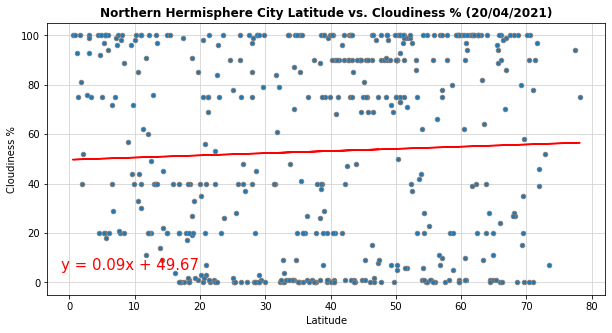

In [139]:
def latitude_cloudiness_regression_north():
    plt.figure(figsize=(10,5))
    x_axis = n_hemi_data['Lat']
    y_axis = n_hemi_data['Cloudiness %']
    correlation = st.pearsonr(x_axis, y_axis)
    print(f'The correlation coefficient is: {round(correlation[0],2)}\
     \n')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis, y_axis, edgecolors = 'grey', s = 20, zorder = 3)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate( line_eq, xy = (0.1,0.18), xycoords = 'figure fraction', horizontalalignment = 'left', verticalalignment='bottom', fontsize=15, color="red")
    plt.grid(zorder = 0, color = 'lightgrey')
    plt.xlabel('Latitude')
    plt.ylabel('Cloudiness %')
    plt.title('Northern Hermisphere City Latitude vs. Cloudiness % ({})'.format(date_data_collected), fontweight = 'bold')
    plt.savefig("../output_data/Northern Hermisphere City Latitude vs. Cloudiness % Regression.png")
latitude_cloudiness_regression_north()
print(f'The diagram shows the relationship between the latitude and cloudiness % of individual\
\ncities in the northern hemisphere of the sample dataset.\
\nThe correlation coefficient suggests a weak relationship between the two variables.\
\nIt would appear to also support the preceeding suggestion that there is a lack of relationship between the two variables.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.28     

The diagram shows the relationship between the latitude and cloudiness % of individual
cities in the southern hemisphere of the sample dataset.
The correlation coefficient suggests a relatively weak relationship between the two variables.
It would appear to also support the preceeding suggestion that there is a lack of relationship between the two variables.
However, there is perhaps marginally more of a relationship between latitude and cloudiness in the southern hermisphere over the north.
This observation could also be skewed slightly from the density of cities with 100% cloudiness close to the equator


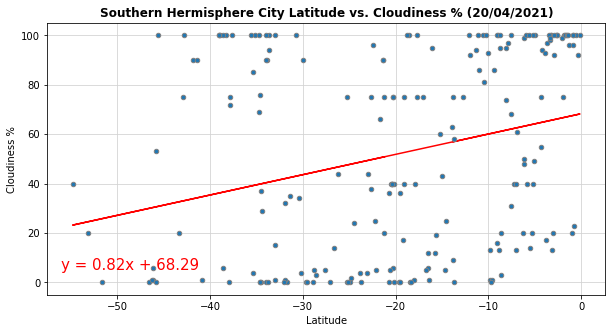

In [140]:
def latitude_cloudiness_regression_south():
    plt.figure(figsize=(10,5))
    x_axis = s_hemi_data['Lat']
    y_axis = s_hemi_data['Cloudiness %']
    correlation = st.pearsonr(x_axis, y_axis)
    print(f'The correlation coefficient is: {round(correlation[0],2)}\
     \n')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis, y_axis, edgecolors = 'grey', s = 20, zorder = 3)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate( line_eq, xy = (0.1,0.18), xycoords = 'figure fraction', horizontalalignment = 'left', verticalalignment='bottom', fontsize=15, color="red")
    plt.grid(zorder = 0, color = 'lightgrey')
    plt.xlabel('Latitude')
    plt.ylabel('Cloudiness %')
    plt.title('Southern Hermisphere City Latitude vs. Cloudiness % ({})'.format(date_data_collected), fontweight = 'bold')
    plt.savefig("../output_data/Southern Hermisphere City Latitude vs. Cloudiness % Regression.png")
latitude_cloudiness_regression_south()
print(f'The diagram shows the relationship between the latitude and cloudiness % of individual\
\ncities in the southern hemisphere of the sample dataset.\
\nThe correlation coefficient suggests a relatively weak relationship between the two variables.\
\nIt would appear to also support the preceeding suggestion that there is a lack of relationship between the two variables.\
\nHowever, there is perhaps marginally more of a relationship between latitude and cloudiness in the southern hermisphere over the north.\
\nThis observation could also be skewed slightly from the density of cities with 100% cloudiness close to the equator')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: 0.16     

The diagram shows the relationship between the latitude and wind speed (kmph) of individual
cities in the northern hemisphere of the sample dataset.
The correlation coefficient suggests a relatively weak relationship between the two variables.


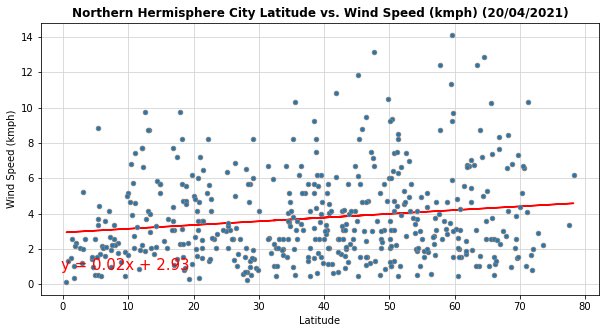

In [142]:
def latitude_wind_regression_north():
    plt.figure(figsize=(10,5))
    x_axis = n_hemi_data['Lat']
    y_axis = n_hemi_data['Wind Speed (kmph)']
    correlation = st.pearsonr(x_axis, y_axis)
    print(f'The correlation coefficient is: {round(correlation[0],2)}\
     \n')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis, y_axis, edgecolors = 'grey', s = 20, zorder = 3)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate( line_eq, xy = (0.1,0.18), xycoords = 'figure fraction', horizontalalignment = 'left', verticalalignment='bottom', fontsize=15, color="red")
    plt.grid(zorder = 0, color = 'lightgrey')
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed (kmph)')
    plt.title('Northern Hermisphere City Latitude vs. Wind Speed (kmph) ({})'.format(date_data_collected), fontweight = 'bold')
    plt.savefig("../output_data/Northern Hermisphere City Latitude vs. Wind Speed (kmph) Regression.png")
latitude_wind_regression_north()
print(f'The diagram shows the relationship between the latitude and wind speed (kmph) of individual\
\ncities in the northern hemisphere of the sample dataset.\
\nThe correlation coefficient suggests a relatively weak relationship between the two variables.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: -0.35     

The diagram shows the relationship between the latitude and wind speed (kmph) of individual
cities in the southern hemisphere of the sample dataset.
The correlation coefficient suggests a relatively weak relationship between the two variables.
However, there is perhaps marginally more of a relationship between latitude and wind speed in the southern hermisphere over the north.
This observation however, could be skewed slightly from the density of cities close to the equator.


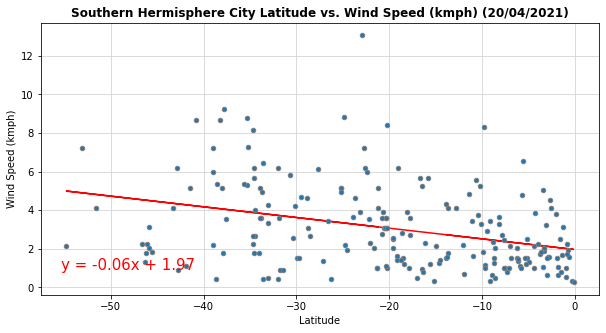

In [146]:
def latitude_wind_regression_south():
    plt.figure(figsize=(10,5))
    x_axis = s_hemi_data['Lat']
    y_axis = s_hemi_data['Wind Speed (kmph)']
    correlation = st.pearsonr(x_axis, y_axis)
    print(f'The correlation coefficient is: {round(correlation[0],2)}\
     \n')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis, y_axis, edgecolors = 'grey', s = 20, zorder = 3)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate( line_eq, xy = (0.1,0.18), xycoords = 'figure fraction', horizontalalignment = 'left', verticalalignment='bottom', fontsize=15, color="red")
    plt.grid(zorder = 0, color = 'lightgrey')
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed (kmph)')
    plt.title('Southern Hermisphere City Latitude vs. Wind Speed (kmph) ({})'.format(date_data_collected), fontweight = 'bold')
    plt.savefig("../output_data/Southern Hermisphere City Latitude vs. Wind Speed (kmph) Regression.png")
latitude_wind_regression_south()
print(f'The diagram shows the relationship between the latitude and wind speed (kmph) of individual\
\ncities in the southern hemisphere of the sample dataset.\
\nThe correlation coefficient suggests a relatively weak relationship between the two variables.\
\nHowever, there is perhaps marginally more of a relationship between latitude and wind speed in the southern hermisphere over the north.\
\nThis observation however, could be skewed slightly from the density of cities close to the equator.')